In [3]:
!pipreqs "/content/drive/MyDrive/Colab Notebooks/Penerapan Data Science" --scan-notebooks

Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
Please, verify manually the final list of requirements.txt to avoid possible dependency confusions.
INFO: Successfully saved requirements file in /content/drive/MyDrive/Colab Notebooks/Penerapan Data Science/requirements.txt


# Proyek Akhir: Menyelesaikan Permasalahan Perusahaan Jaya Jaya Maju

- Nama: Resha Meiranadi Caturkusuma
- Email: reshameiranadi@gmail.com
- Id Dicoding: resha_meiranadi

# Persiapan

## Menyiapkan library yang dibutuhkan

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

## Menyiapkan data yang akan digunakan

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/dicodingacademy/dicoding_dataset/main/employee/employee_data.csv")

In [ ]:
df

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,NaN,Travel_Frequently,1444,Human Resources,1,4,Other,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,Travel_Rarely,1141,Research & Development,11,2,Medical,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,Travel_Rarely,1323,Research & Development,4,4,Life Sciences,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,Travel_Frequently,555,Sales,26,3,Marketing,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,NaN,Travel_Rarely,1194,Research & Development,2,4,Medical,1,...,2,80,3,20,2,3,5,3,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1466,38,0.0,Travel_Rarely,168,Research & Development,1,3,Life Sciences,1,...,4,80,0,10,4,4,1,0,0,0
1466,1467,50,NaN,Travel_Rarely,813,Research & Development,17,5,Life Sciences,1,...,3,80,3,19,3,3,14,11,1,11
1467,1468,28,1.0,Travel_Rarely,1485,Research & Development,12,1,Life Sciences,1,...,4,80,0,1,4,2,1,1,0,0
1468,1469,40,0.0,Non-Travel,458,Research & Development,16,2,Life Sciences,1,...,2,80,1,6,0,3,4,2,0,0


The data contains demographic details, work-related metrics and attrition flag.

**Demographic**
* Age - Age of the employee
* DistanceFromHome - Distance from work to home (in km)
* Education - 1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor
* EducationField - Field of Education
* Gender - Employee's gender
* MaritalStatus - Marital Status
* MonthlyIncome - Monthly salary
* MonthlyRate - Mounthly rate
* NumCompaniesWorked - Number of companies worked at
* Over18 - Over 18 years of age?
* RelationshipSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High

**Work-realted**
* EmployeeId - Employee Identifier
* Attrition - Did the employee attrition? (0=no, 1=yes)
* BusinessTravel - Travel commitments for the job
* DailyRate - Daily salary
* Department - Employee Department
* EnvironmentSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* HourlyRate - Hourly salary
* JobInvolvement - 1-Low, 2-Medium, 3-High, 4-Very High
* JobLevel - Level of job (1 to 5)
* JobRole - Job Roles
* JobSatisfaction - 1-Low, 2-Medium, 3-High, 4-Very High
* OverTime - Overtime?
* PercentSalaryHike - The percentage increase in salary last year
* PerformanceRating - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* StandardHours - Standard Hours
* StockOptionLevel - Stock Option Level
* TotalWorkingYears - Total years worked
* TrainingTimesLastYear - Number of training attended last year
* WorkLifeBalance - 1-Low, 2-Good, 3-Excellent, 4-Outstanding
* YearsAtCompany - Years at Company
* YearsInCurrentRole - Years in the current role
* YearsSinceLastPromotion - Years since the last promotion
* YearsWithCurrManager - Years with the current manager

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeId                1470 non-null   int64  
 1   Age                       1470 non-null   int64  
 2   Attrition                 1058 non-null   float64
 3   BusinessTravel            1470 non-null   object 
 4   DailyRate                 1470 non-null   int64  
 5   Department                1470 non-null   object 
 6   DistanceFromHome          1470 non-null   int64  
 7   Education                 1470 non-null   int64  
 8   EducationField            1470 non-null   object 
 9   EmployeeCount             1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [ ]:
df.describe(include='all')

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1058.000000,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,NaN,NaN,3,NaN,3,NaN,NaN,6,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,1043,NaN,961,NaN,NaN,606,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,735.500000,36.923810,0.169187,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,424.496761,9.135373,0.375094,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,1.000000,18.000000,0.000000,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,368.250000,30.000000,0.000000,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,735.500000,36.000000,0.000000,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1102.750000,43.000000,0.000000,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


Sebelum melakukan EDA, mari kita periksa terlebih dahulu apakah ada missing values pada dataset ini

In [ ]:
print(df.isnull().sum()[df.isnull().sum() > 0])

Attrition    412
dtype: int64


Dikarenakan atribut Attrition memiliki missing values, maka akan kita tangani terlebih dahulu. Untuk nilai yang hilang, dalam hal ini akan kita asumsikan tidak keluar dari perusahaan (Attrition = 0). Kita dapat melakukannya dengan mengisi nilai yang hilang menggunakan modus dengan kode berikut

In [ ]:
df['Attrition'] = df['Attrition'].fillna(df['Attrition'].mode()[0])

Mari kita periksa sekali lagi untuk memastikan tidak ada kolom yang memiliki missing values

In [ ]:
print(df.isnull().sum())

EmployeeId                  0
Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

# Data Understanding (EDA)

Proyek berlanjut ke tahap Exploratory Data Analysis, yaitu tahap untuk mengidentifikasi pola umum pada data dengan memahami distribusi dan hubungan antar atribut, terutama antara variabel independen dan variabel target (Attrition), menggunakan sejumlah diagram visualisasi.

## Distribution Analysis

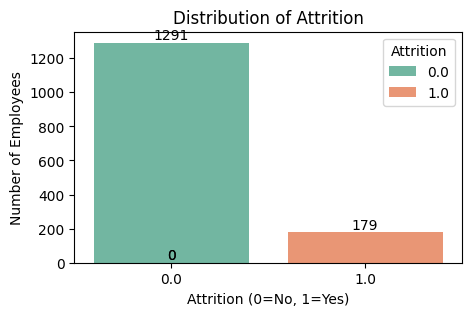

In [ ]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Attrition', hue='Attrition', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Attrition')
plt.xlabel('Attrition (0=No, 1=Yes)')
plt.ylabel('Number of Employees')
plt.show()

Berdasarkan visualisasi tersebut, kolom Attrition memiliki distribusi yang tidak seimbang di mana pegawai yang tidak pergi ada sebanyak 1291 dan yang pergi (Attrition = 1) sebanyak 179 pegawai.

Setelah itu mari kita lihat distribusi beberapa atribut lainnya dan hubungannya terhadap atribut Attrition, diantaranya:
1. Distance From Home
2. Business Travel
3. Years With Curr Manager

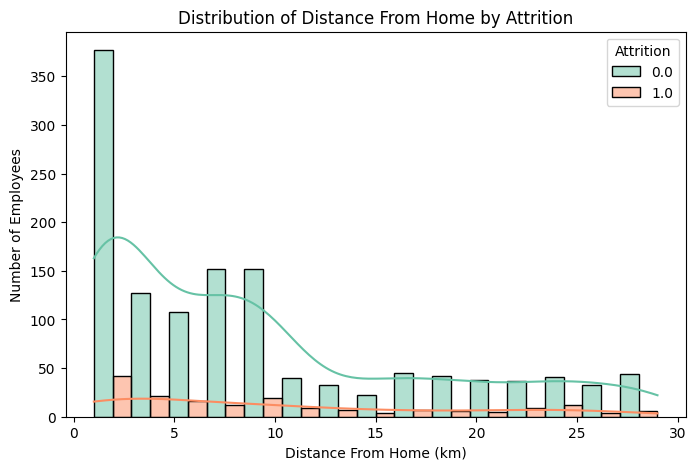

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='DistanceFromHome', hue='Attrition', kde=True, palette='Set2', bins=15, multiple='dodge')

plt.title('Distribution of Distance From Home by Attrition')
plt.xlabel('Distance From Home (km)')
plt.ylabel('Number of Employees')
plt.show()

Histogram di atas menunjukan bahwa sebagian besar pegawai yang tinggal relatif dekat dengan tempat kerja (kurang dari 10 km) cenderung tetap bertahan di perusahaan. Sedangkan pegawai yang tinggal lebih jauh cenderung sedikit jumlah yang memilih untuk tetap bertahan. Histplot ini memberikan indikasi awal bahwa jarak rumah ke tempat kerja mungkin memiliki hubungan dengan tingkat attrition.

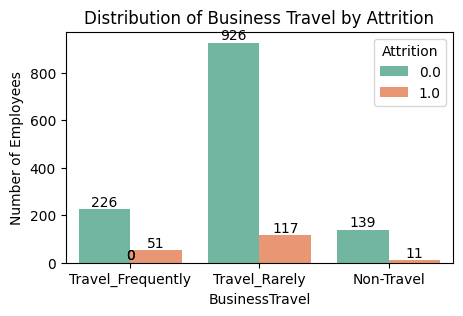

In [ ]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='BusinessTravel', hue='Attrition', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Business Travel by Attrition')
plt.xlabel('BusinessTravel')
plt.ylabel('Number of Employees')
plt.show()

Hasil visualisasi menunjukkan adanya hubungan antara frekuensi bepergian untuk pekerjaan dengan keputusan attrition pegawai. Pegawai yang lebih sering bepergian memiliki persentase attrition "Yes" yang paling tinggi (18.4%), dibandingkan dengan mereka yang jarang bepergian (11.2%) atau tidak bepergian sama sekali (7%). Hal ini mengindikasikan bahwa tingkat mobilitas pekerjaan dapat menjadi salah satu faktor yang memengaruhi keputusan pegawai untuk keluar dari perusahaan.

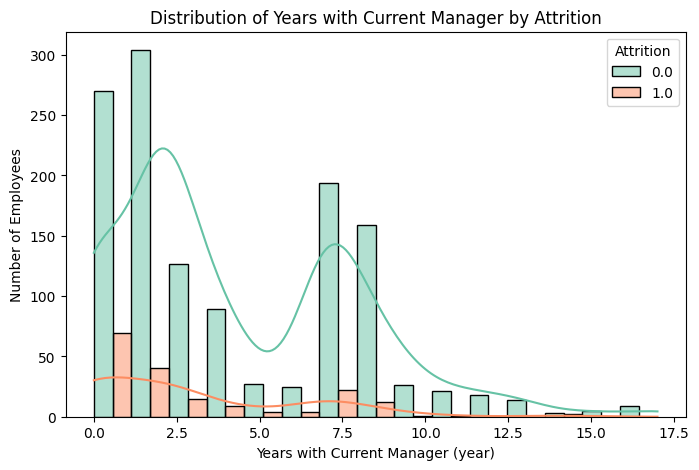

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='YearsWithCurrManager', hue='Attrition', kde=True, palette='Set2', bins=15, multiple='dodge')

plt.title('Distribution of Years with Current Manager by Attrition')
plt.xlabel('Years with Current Manager (year)')
plt.ylabel('Number of Employees')
plt.show()

Histplot tersebut menunjukan bahwa sebagian besar pegawai yang baru bekerja dengan manajer saat ini (kurang dari 2 tahun) cukup banyak keluar dari perusahaan. Namun, jumlah yang memilih untuk bertahan juga cukup banyak. Sedangkan pegawai yang telah lama bekerja dengan manajer saat ini, semakin sedikit jumlahnya yang keluar.

## Hubungan Atribut Demografis dengan Attrition Pegawai

### Gender

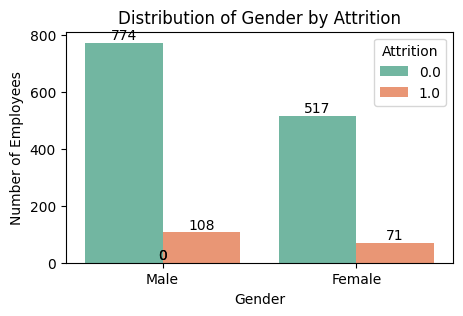

In [ ]:
plt.figure(figsize=(5, 3))
ax = sns.countplot(x='Gender', hue='Attrition', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Gender by Attrition')
plt.xlabel('Gender')
plt.ylabel('Number of Employees')
plt.show()

Presentasi pegawai laki-laki yang keluar dari perusahaan sebesar 12.2% dari seluruh pegawai laki-laki yang ada. Sedangkan presentase pegawai perepmpuan yang keluar dari perusahaan ada di angka 12% dari seluruh pegawai perempuan dalam perusahaan tersebut. Dikarenakan angka yang tidak jauh berbeda, kita bisa menyimpulkan bahwa jenis kelamin tidak memiliki pengaruh yang signifikan terhadap attrition pegawai

### Age

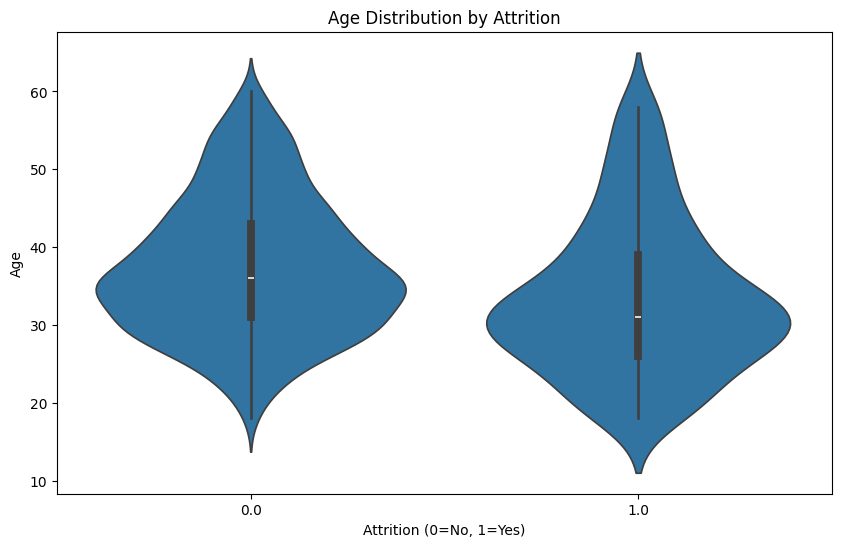

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Attrition', y='Age', data=df)
plt.title('Age Distribution by Attrition')
plt.xlabel('Attrition (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

Tampaknya tidak ada perbedaan yang signifikan dalam distribusi usia antara pegawai yang tetap bertahan dan yang keluar. Kedua kelompok memiliki distribusi usia yang cukup mirip, dengan median usia yang tidak jauh berbeda. Akan tetapi, data menunjukan bahwa pegawai yang memilih untuk keluar mayoritas cenderung memiliki usia yang lebih muda dibandingkan pegawai yang memilih bertahan. Ini menunjukkan bahwa usia bisa menjadi salah satu faktor dominan yang mempengaruhi keputusan pegawai untuk keluar dari perusahaan dalam dataset ini.

### Marital Status

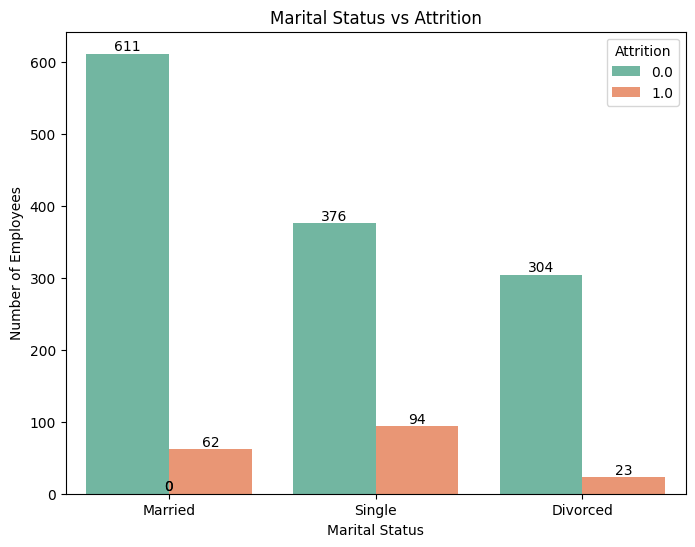

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='MaritalStatus', hue='Attrition', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Marital Status vs Attrition')
plt.xlabel('Marital Status')
plt.ylabel('Number of Employees')
plt.show()

Grafik tersebut menunjukan sebagian besar pegawai yang menikah (611 orang) cenderung tetap bertahan di perusahaan. Angka ini jauh lebih tinggi dibandingkan dengan jumlah pegawai menikah yang keluar. Akan tetapi, persentase pegawai yang masih single dan memilih untuk keluar lebih besar dibandingkan yang sudah menikah. Hal tersebut mengindikasikan bahwa status pernikahan, terutama untuk pegawai yang masih single, bisa menjadi salah satu faktor dalam pengambilan keputusan pegawai.

<ipython-input-16-7b3c17500eaa>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 0], x='MaritalStatus', palette='Blues')
<ipython-input-16-7b3c17500eaa>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 1], x='MaritalStatus', palette='Reds')


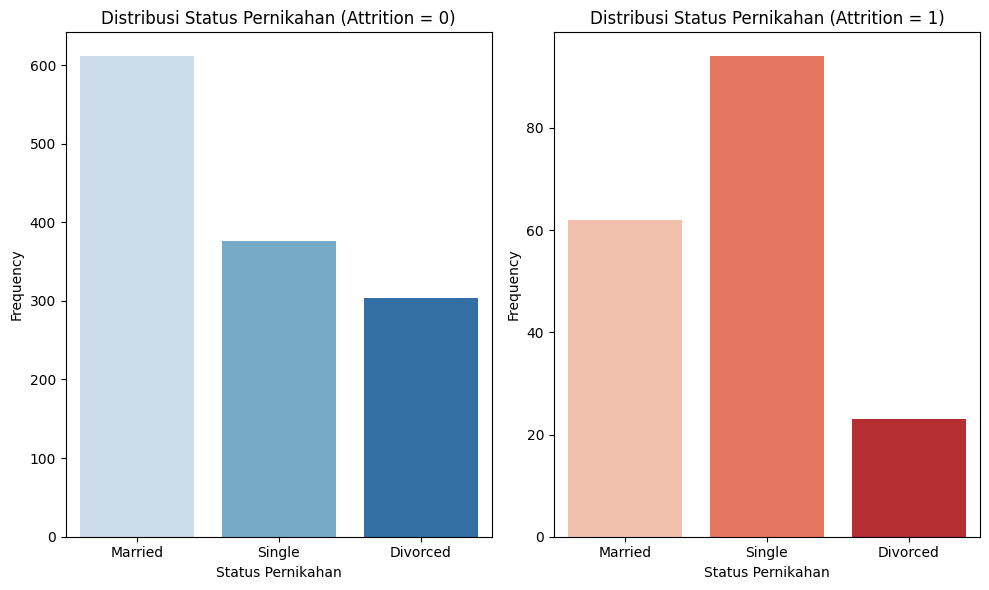

In [ ]:
plt.figure(figsize=(10, 6))

# Plot pertama: Distribusi Daily Rate untuk Attrition = 0
plt.subplot(1, 2, 1)
sns.countplot(data=df[df['Attrition'] == 0], x='MaritalStatus', palette='Blues')
plt.title('Distribusi Status Pernikahan (Attrition = 0)')
plt.xlabel('Status Pernikahan')
plt.ylabel('Frequency')

# Plot kedua: Distribusi Daily Rate untuk Attrition = 1
plt.subplot(1, 2, 2)
sns.countplot(data=df[df['Attrition'] == 1], x='MaritalStatus', palette='Reds')
plt.title('Distribusi Status Pernikahan (Attrition = 1)')
plt.xlabel('Status Pernikahan')
plt.ylabel('Frequency')

# Tampilkan plot
plt.tight_layout()
plt.show()


### Latar Belakang Pendidikan

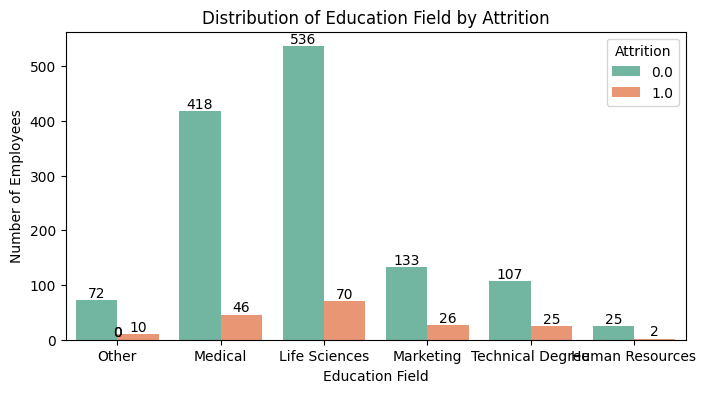

In [ ]:
plt.figure(figsize=(8, 4))
ax = sns.countplot(x='EducationField', hue='Attrition', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Education Field by Attrition')
plt.xlabel('Education Field')
plt.ylabel('Number of Employees')
plt.show()

Dari visualisasi, terlihat bahwa jumlah pegawai dengan attrition "Yes" tertinggi berasal dari bidang pendidikan Life Science, dengan total 70 orang. Namun, perlu dicatat bahwa bidang Life Science juga memiliki jumlah pegawai keseluruhan yang paling banyak dibandingkan bidang lainnya. Hal ini menyebabkan persentase attrition "Yes" dalam setiap bidang pendidikan cenderung serupa. Oleh karena itu, data ini menunjukkan bahwa latar belakang pendidikan kemungkinan besar bukan faktor yang signifikan dalam memengaruhi keputusan attrition.

## Hubungan Atribut Pekerjaan dengan Attrition Pegawai

### Tingkat Kepuasan Kerja

In [ ]:
print(df.JobSatisfaction.value_counts())

JobSatisfaction
4    459
3    442
1    289
2    280
Name: count, dtype: int64


<ipython-input-19-73d2e5b89e15>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 0], x='JobSatisfaction', palette='Blues')
<ipython-input-19-73d2e5b89e15>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 1], x='JobSatisfaction', palette='Reds')


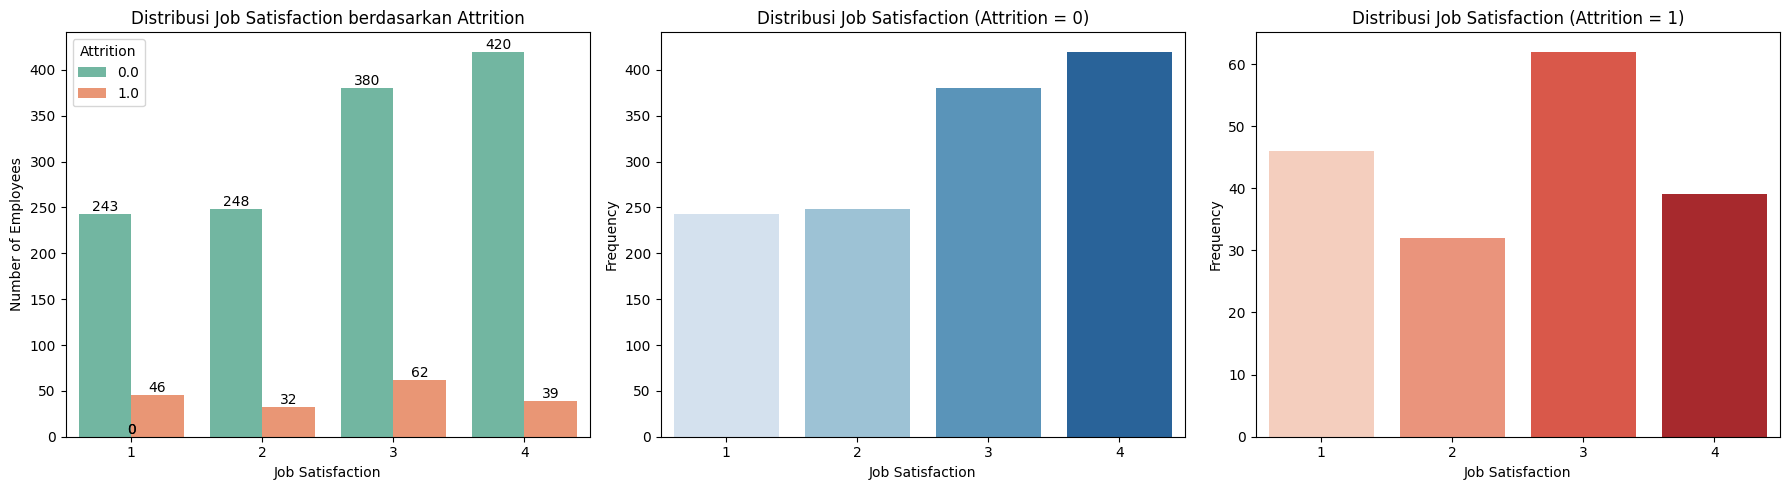

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
ax = sns.countplot(x='JobSatisfaction', hue='Attrition', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.title('Distribusi Job Satisfaction berdasarkan Attrition')
plt.xlabel('Job Satisfaction')
plt.ylabel('Number of Employees')

plt.subplot(1, 3, 2)
sns.countplot(data=df[df['Attrition'] == 0], x='JobSatisfaction', palette='Blues')
plt.title('Distribusi Job Satisfaction (Attrition = 0)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.countplot(data=df[df['Attrition'] == 1], x='JobSatisfaction', palette='Reds')
plt.title('Distribusi Job Satisfaction (Attrition = 1)')
plt.xlabel('Job Satisfaction')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Diagram batang di atas menunjukkan bahwa distribusi pegawai yang tetap bertahan di perusahaan cenderung meningkat seiring dengan tingginya tingkat kepuasan kerja. Sebaliknya, untuk pegawai yang memilih keluar (attrition "Yes"), distribusi tidak menunjukkan perbedaan yang signifikan di antara berbagai tingkat kepuasan kerja. Hal ini mengindikasikan bahwa persentase pegawai dengan tingkat kepuasan kerja rendah yang meninggalkan perusahaan cenderung lebih tinggi dibandingkan dengan mereka yang memiliki tingkat kepuasan kerja tinggi.

Kesimpulannya, tingkat kepuasan kerja tampaknya menjadi faktor penting yang memengaruhi keputusan pegawai untuk tetap bertahan. Pegawai yang merasa kurang puas dengan pekerjaannya lebih rentan untuk keluar dari perusahaan.

### Work-life balance

In [ ]:
print(df.WorkLifeBalance.value_counts())

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


<ipython-input-21-de2ce97a6d50>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 0], x='WorkLifeBalance', palette='Blues')
<ipython-input-21-de2ce97a6d50>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 1], x='WorkLifeBalance', palette='Reds')


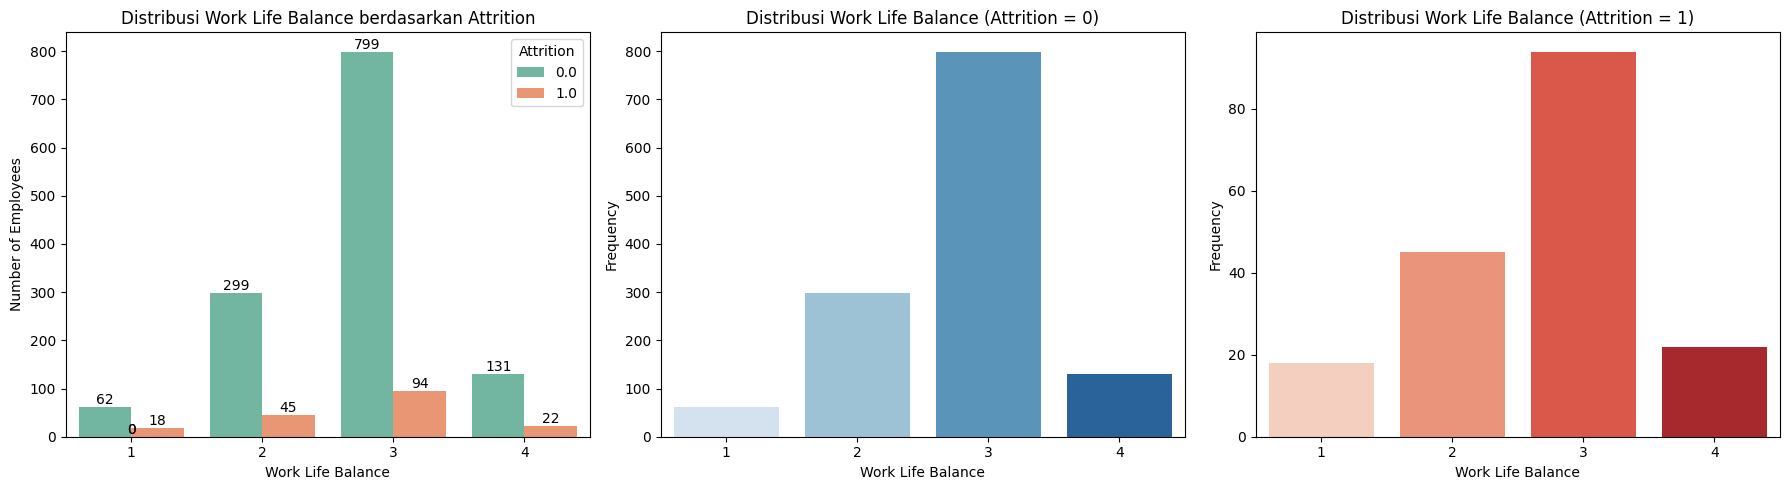

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
ax = sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.title('Distribusi Work Life Balance berdasarkan Attrition')
plt.xlabel('Work Life Balance')
plt.ylabel('Number of Employees')

plt.subplot(1, 3, 2)
sns.countplot(data=df[df['Attrition'] == 0], x='WorkLifeBalance', palette='Blues')
plt.title('Distribusi Work Life Balance (Attrition = 0)')
plt.xlabel('Work Life Balance')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.countplot(data=df[df['Attrition'] == 1], x='WorkLifeBalance', palette='Reds')
plt.title('Distribusi Work Life Balance (Attrition = 1)')
plt.xlabel('Work Life Balance')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Kesimpulan dari visualisasi ini menunjukkan bahwa pegawai dengan tingkat work-life balance rendah (kategori 1) memiliki persentase attrition tertinggi, yaitu sebesar 22.5%. Sebaliknya, pegawai dengan work-life balance kategori 3 dan 4 memiliki tingkat attrition yang lebih rendah, masing-masing sebesar 10.52% dan 14.7%. Hal ini mengindikasikan bahwa keseimbangan antara pekerjaan dan kehidupan pribadi memainkan peran penting dalam keputusan pegawai untuk tetap bekerja di perusahaan.

### Performance Rating

In [ ]:
print(df.PerformanceRating.value_counts())

PerformanceRating
3    1244
4     226
Name: count, dtype: int64


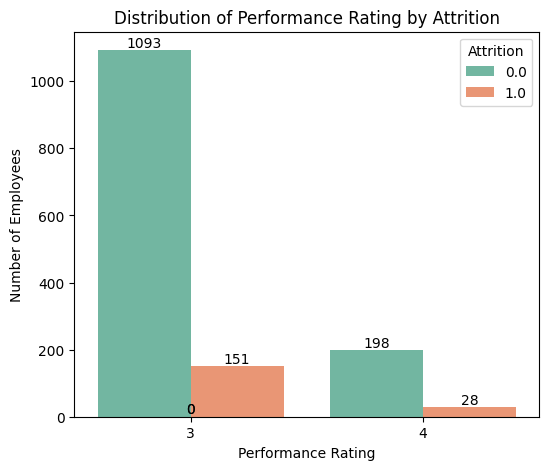

In [ ]:
plt.figure(figsize=(6, 5))
ax = sns.countplot(x='PerformanceRating', hue='Attrition', data=df, palette='Set2')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')

plt.title('Distribution of Performance Rating by Attrition')
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')
plt.show()

Visualisasi tersebut menunjukan adanya presentase pegawai Attrition yang lebih tinggi pada Performace Rating 4 sebesar 12.4% diabndingkan pegawau dengan Performance Rating 4 sebesar 12.1%. Meski selisihnya kecil, ada indikasi bahwa pegawai dengan Performance Rating lebih tingga (3) mungkin lebih cenderung keluar dibandingkan mereka dengan Performance Rating lebih rendah (3). Namun, tidak adanya perbedaan yang mencolok dalam persentase Attrition antara Performance Rating 3 dan 4  mengindikasikan bahwa Performance Rating mungkin bukan satu-satunya faktor utama yang memengaruhi keputusan pegawai untuk keluar.

## Hubungan Pendapatan Bulanan / Harian pada Attrition

### Daily Rate

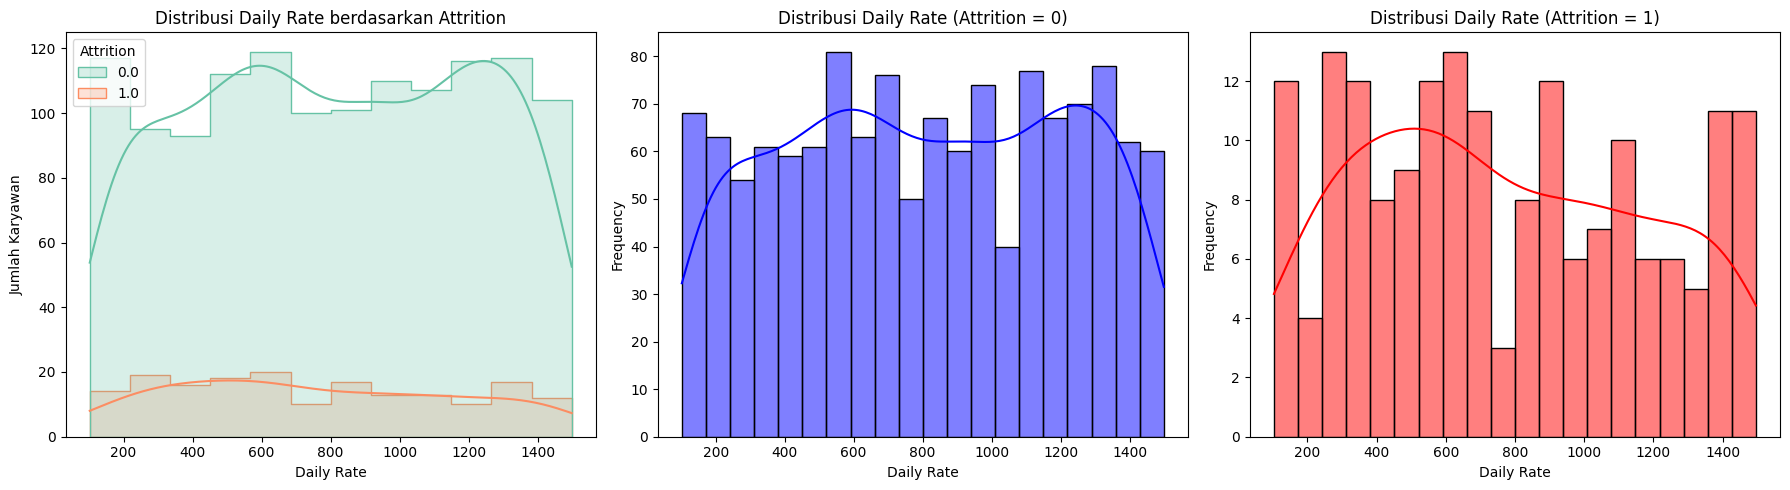

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='DailyRate', hue='Attrition', kde=True, element="step", palette='Set2')
plt.title('Distribusi Daily Rate berdasarkan Attrition')
plt.xlabel('Daily Rate')
plt.ylabel('Jumlah Karyawan')

plt.subplot(1, 3, 2)
sns.histplot(data=df[df['Attrition'] == 0], x='DailyRate', kde=True, color='blue', bins=20)
plt.title('Distribusi Daily Rate (Attrition = 0)')
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data=df[df['Attrition'] == 1], x='DailyRate', kde=True, color='red', bins=20)
plt.title('Distribusi Daily Rate (Attrition = 1)')
plt.xlabel('Daily Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Hasil analisis dari kode di atas menunjukkan bahwa mayoritas pegawai dengan attrition "Yes" memiliki gaji harian yang terkonsentrasi pada rentang 400-600, dengan jumlah yang cukup signifikan pada rentang 100-400. Hal ini mengindikasikan bahwa sebagian besar pegawai yang keluar cenderung berada di kelompok dengan gaji harian yang lebih rendah.

Sebaliknya, distribusi gaji harian untuk pegawai dengan attrition "No" relatif lebih merata di seluruh rentang, dengan puncak pada rentang 600 hingga 1200. Temuan ini menunjukkan bahwa pegawai yang tetap bertahan cenderung memiliki daily rate yang sedikit lebih tinggi dibandingkan dengan mereka yang keluar. Namun, meskipun terdapat perbedaan dalam distribusi gaji harian, hasil ini juga mengindikasikan bahwa gaji bukanlah satu-satunya faktor utama yang memengaruhi keputusan attrition.

### Monthly Income

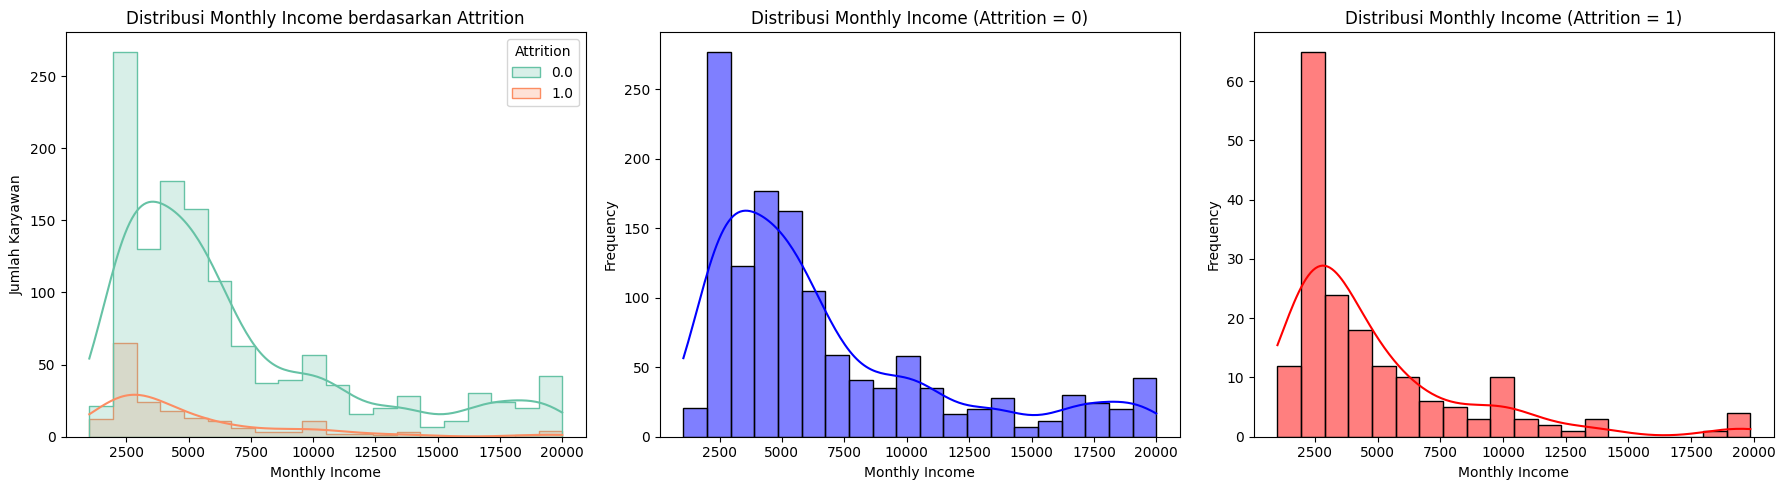

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='MonthlyIncome', hue='Attrition', kde=True, element="step", palette='Set2')
plt.title('Distribusi Monthly Income berdasarkan Attrition')
plt.xlabel('Monthly Income')
plt.ylabel('Jumlah Karyawan')

plt.subplot(1, 3, 2)
sns.histplot(data=df[df['Attrition'] == 0], x='MonthlyIncome', kde=True, color='blue', bins=20)
plt.title('Distribusi Monthly Income (Attrition = 0)')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data=df[df['Attrition'] == 1], x='MonthlyIncome', kde=True, color='red', bins=20)
plt.title('Distribusi Monthly Income (Attrition = 1)')
plt.xlabel('Monthly Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Bar chart ini memberikan indikasi awal bahwa pendapatan bulanan memiliki hubungan dengan tingkat attrition. Pegawai dengan pendapatan yang lebih rendah cenderung lebih mudah keluar dari perusahaan. Namun, perlu diingat bahwa pendapatan bulanan hanyalah salah satu faktor yang mempengaruhi keputusan pegawai untuk keluar.

### Monthly Rate

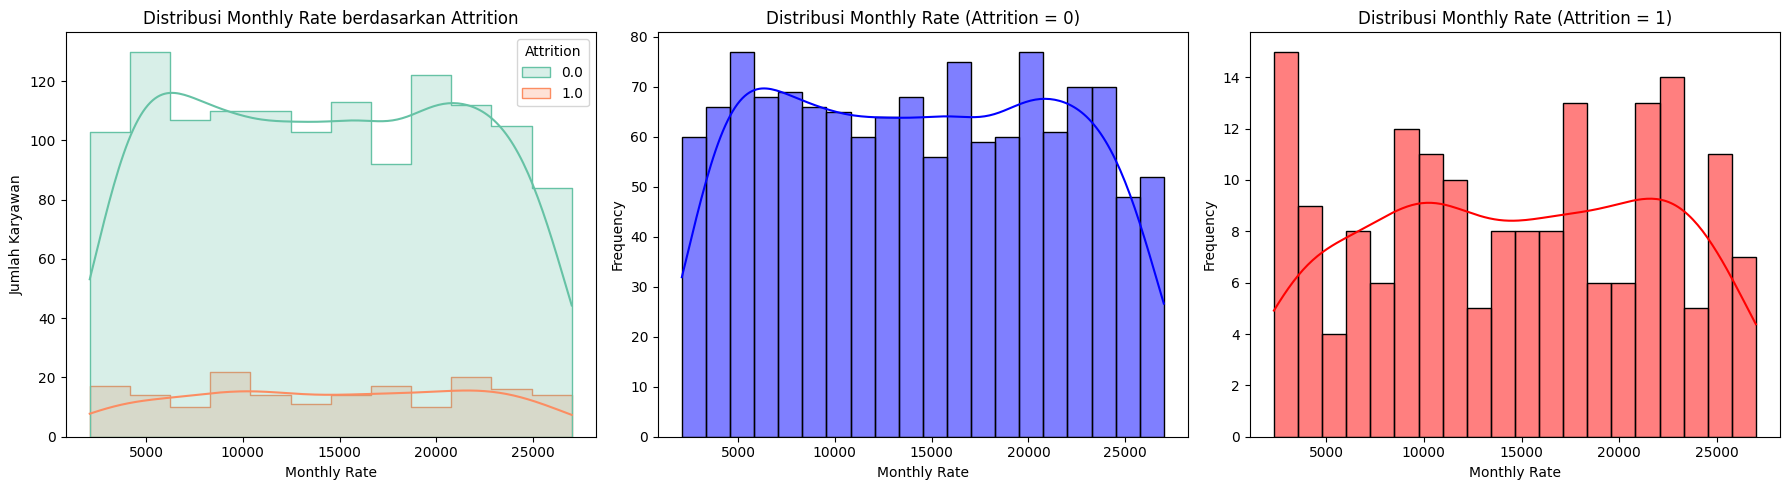

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='MonthlyRate', hue='Attrition', kde=True, element="step", palette='Set2')
plt.title('Distribusi Monthly Rate berdasarkan Attrition')
plt.xlabel('Monthly Rate')
plt.ylabel('Jumlah Karyawan')

plt.subplot(1, 3, 2)
sns.histplot(data=df[df['Attrition'] == 0], x='MonthlyRate', kde=True, color='blue', bins=20)
plt.title('Distribusi Monthly Rate (Attrition = 0)')
plt.xlabel('Monthly Rate')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data=df[df['Attrition'] == 1], x='MonthlyRate', kde=True, color='red', bins=20)
plt.title('Distribusi Monthly Rate (Attrition = 1)')
plt.xlabel('Monthly Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Berdasarkan grafik di atas, dapat disimpulkan bahwa terdapat hubungan antara pendapatan bulanan dengan tingkat attrition pegawai. Pegawai dengan pendapatan yang lebih rendah cenderung lebih mudah keluar dari perusahaan.

## Hubungan Attrition dengan Department

<ipython-input-27-d6502d4ee5ab>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 0], x='Department', palette='Blues')
<ipython-input-27-d6502d4ee5ab>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 1], x='Department', palette='Reds')


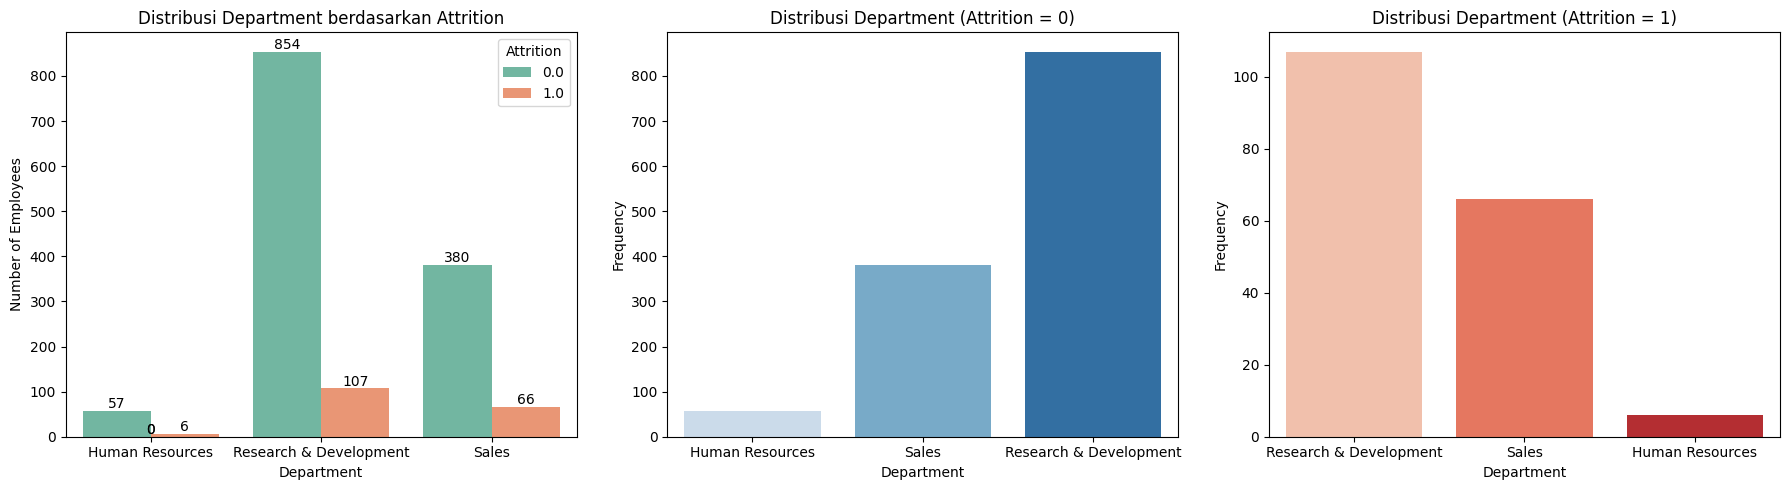

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
ax = sns.countplot(x='Department', hue='Attrition', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.title('Distribusi Department berdasarkan Attrition')
plt.xlabel('Department')
plt.ylabel('Number of Employees')

plt.subplot(1, 3, 2)
sns.countplot(data=df[df['Attrition'] == 0], x='Department', palette='Blues')
plt.title('Distribusi Department (Attrition = 0)')
plt.xlabel('Department')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.countplot(data=df[df['Attrition'] == 1], x='Department', palette='Reds')
plt.title('Distribusi Department (Attrition = 1)')
plt.xlabel('Department')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Hasil visualisasi menunjukkan bahwa tingkat attrition bervariasi antar departemen dalam perusahaan. Departemen Sales memiliki tingkat attrition tertinggi dengan persentase 14.7%, diikuti oleh departemen Research & Development sebesar 11.1%, dan departemen Human Resources dengan persentase terendah yaitu 9.5%. Hal ini mengindikasikan bahwa pegawai di departemen Sales cenderung lebih rentan untuk keluar dibandingkan departemen lainnya.

# Data Preprocessing

## Data Cleaning

In [ ]:
duplicate_rows = df[df.duplicated()]
print("Number of duplicate rows:", len(duplicate_rows))
print(duplicate_rows)

duplicate_employee_ids = df[df.duplicated(subset=['EmployeeId'])]
print("\nDuplicate Employee IDs:")
duplicate_employee_ids

Number of duplicate rows: 0
Empty DataFrame
Columns: [EmployeeId, Age, Attrition, BusinessTravel, DailyRate, Department, DistanceFromHome, Education, EducationField, EmployeeCount, EnvironmentSatisfaction, Gender, HourlyRate, JobInvolvement, JobLevel, JobRole, JobSatisfaction, MaritalStatus, MonthlyIncome, MonthlyRate, NumCompaniesWorked, Over18, OverTime, PercentSalaryHike, PerformanceRating, RelationshipSatisfaction, StandardHours, StockOptionLevel, TotalWorkingYears, TrainingTimesLastYear, WorkLifeBalance, YearsAtCompany, YearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager]
Index: []

[0 rows x 35 columns]

Duplicate Employee IDs:


,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


## Encoding

In [ ]:
real_df = df.copy()

In [ ]:
le = LabelEncoder()

categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

df.head()

,EmployeeId,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,1,38,0.0,1,1444,0,1,4,4,1,...,2,80,1,7,2,3,6,2,1,2
1,2,37,1.0,2,1141,1,11,2,3,1,...,1,80,0,15,2,1,1,0,0,0
2,3,51,1.0,2,1323,1,4,4,1,1,...,3,80,3,18,2,4,10,0,2,7
3,4,42,0.0,1,555,2,26,3,2,1,...,4,80,1,23,2,4,20,4,4,8
4,5,40,0.0,2,1194,1,2,4,3,1,...,2,80,3,20,2,3,5,3,0,2


In [ ]:
X = df.drop(columns=['Attrition', 'EmployeeId'], axis=1)
y = df['Attrition']

## Normalization

In [ ]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Modeling

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(solver='liblinear') # Use liblinear solver for smaller datasets
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"Confusion Matrix:\n{conf_matrix}")

Accuracy: 0.8979591836734694
Precision: 0.6
Recall: 0.1875
Confusion Matrix:
[[258   4]
 [ 26   6]]


In [ ]:
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': abs(model.coef_[0])})
feature_importances = feature_importances.sort_values('importance', ascending=False)
feature_importances

,feature,importance
20,OverTime,1.550789
11,JobInvolvement,1.314788
31,YearsSinceLastPromotion,1.292155
30,YearsInCurrentRole,1.188319
32,YearsWithCurrManager,1.176514
8,EnvironmentSatisfaction,1.175748
0,Age,1.138729
18,NumCompaniesWorked,1.033366
3,Department,0.907160
26,TotalWorkingYears,0.884134


In [ ]:


# Initialize and train the Random Forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf}")
print(f"Random Forest Precision: {precision_rf}")
print(f"Random Forest Recall: {recall_rf}")
print(f"Random Forest Confusion Matrix:\n{conf_matrix_rf}")

# Feature Importance
feature_importances_rf = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importances_rf = feature_importances_rf.sort_values('importance', ascending=False)
feature_importances_rf

Random Forest Accuracy: 0.8843537414965986
Random Forest Precision: 0.3333333333333333
Random Forest Recall: 0.0625
Random Forest Confusion Matrix:
[[258   4]
 [ 30   2]]


,feature,importance
0,Age,0.073557
16,MonthlyIncome,0.070469
2,DailyRate,0.058292
17,MonthlyRate,0.056744
10,HourlyRate,0.052426
26,TotalWorkingYears,0.052118
4,DistanceFromHome,0.047082
29,YearsAtCompany,0.043063
20,OverTime,0.042371
18,NumCompaniesWorked,0.038092


In [ ]:
# prompt: train using xgboost



# Initialize and train the XGBoost classifier
xgb_model = xgb.XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Precision: {precision_xgb}")
print(f"XGBoost Recall: {recall_xgb}")
print(f"XGBoost Confusion Matrix:\n{conf_matrix_xgb}")

# Feature Importance
feature_importances_xgb = pd.DataFrame({'feature': X.columns, 'importance': xgb_model.feature_importances_})
feature_importances_xgb = feature_importances_xgb.sort_values('importance', ascending=False)
feature_importances_xgb

XGBoost Accuracy: 0.8809523809523809
XGBoost Precision: 0.38461538461538464
XGBoost Recall: 0.15625
XGBoost Confusion Matrix:
[[254   8]
 [ 27   5]]


,feature,importance
25,StockOptionLevel,0.085713
20,OverTime,0.082822
16,MonthlyIncome,0.046392
11,JobInvolvement,0.044955
0,Age,0.041640
26,TotalWorkingYears,0.041376
18,NumCompaniesWorked,0.041338
15,MaritalStatus,0.040668
3,Department,0.040521
8,EnvironmentSatisfaction,0.039590


# Evaluation

## Feature Importances

Untuk mengetahui faktor yang paling berpengaruh pada Attrition pegawai, kita dapat melakukan analisis Feature Importances pada ketiga model yang telah kita susun. Dalam hal ini, kita ambil 3 fitur teratas untuk masing-masing model logistic regression, random forest, dan xgboost.

In [ ]:
# Top 3 features for Logistic Regression
top_3_lr = feature_importances.head(3)
print("Top 3 features for Logistic Regression:")
print(top_3_lr)

# Top 3 features for Random Forest
top_3_rf = feature_importances_rf.head(3)
print("\nTop 3 features for Random Forest:")
print(top_3_rf)

# Top 3 features for XGBoost
top_3_xgb = feature_importances_xgb.head(3)
print("\nTop 3 features for XGBoost:")
print(top_3_xgb)

Top 3 features for Logistic Regression:
                    feature  importance
20                 OverTime    1.550789
11           JobInvolvement    1.314788
31  YearsSinceLastPromotion    1.292155

Top 3 features for Random Forest:
          feature  importance
0             Age    0.073557
16  MonthlyIncome    0.070469
2       DailyRate    0.058292

Top 3 features for XGBoost:
             feature  importance
25  StockOptionLevel    0.085713
20          OverTime    0.082822
16     MonthlyIncome    0.046392


Berdasarkan analisis feature importances di atas, sejumlah faktor yang cukup berpengaruh pada keputusan pegawai untuk tetap bertahan atau keluar dari perusahaan diantaranya adalah
1. Over Time
2. Monthly Income
3. Job Involvement
4. Stock Option Level
5. Age
6. Years Since Last Promotion
7. Daily Rate

Beberapa atribut telah kita analisis pada tahapan Exploratory Data Analysis, yaitu Monthly Income, Age, dan Daily Rate. Mari kita ulas kembali ketiga atribut tersebut

1. Monthly Income

Visualisasi diagram batang pada EDA telah menunjukan adanya indikasi awal bahwa pendapatan bulanan memiliki hubungan dengan tingkat attrition. Pegawai dengan pendapatan yang lebih rendah cenderung lebih mudah keluar dari perusahaan. Hal ini dibuktikan dengan tingginya kepentingan atribut Monthly Income dalam model prediksi.

2. Age

Meskipun tidak ada perbedaan yang signifikan dalam distribusi usia antara pegawai yang tetap bertahan dan yang keluar, namun diagram violin menunjukan adanya sedikit perbedaan pada median kedua nilai tersebut, di mana median dari pegawai yang memilih untuk keluar cenderung memiliki usia yang lebih muda dibandingkan pegawai yang memilih bertahan. Ini menunjukkan bahwa usia bisa menjadi salah satu faktor dominan yang mempengaruhi keputusan pegawai yang dibuktikan melalui analisis features importance tersebut.

3. Daily Rate

Tahapan EDA menunjukkan bahwa pegawai yang tetap bertahan cenderung memiliki daily rate yang sedikit lebih tinggi dibandingkan dengan mereka yang keluar. Hal tersebut menunjukan bahwa daily rate mungkin menjadi salah satu faktor penting dalam pengambilan keputusan untuk bertahan atau keluar dari perusahaan. Terbukti melalui analaisis feature importances, di mana atribut ini menjadi salah satu faktor yang paling penting dalam model prediksi.

## Visualisasi

### Hubungan Attrition dengan Over Time


<ipython-input-39-f988d60dca42>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 0], x='OverTime', palette='Blues')
<ipython-input-39-f988d60dca42>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 1], x='OverTime', palette='Reds')


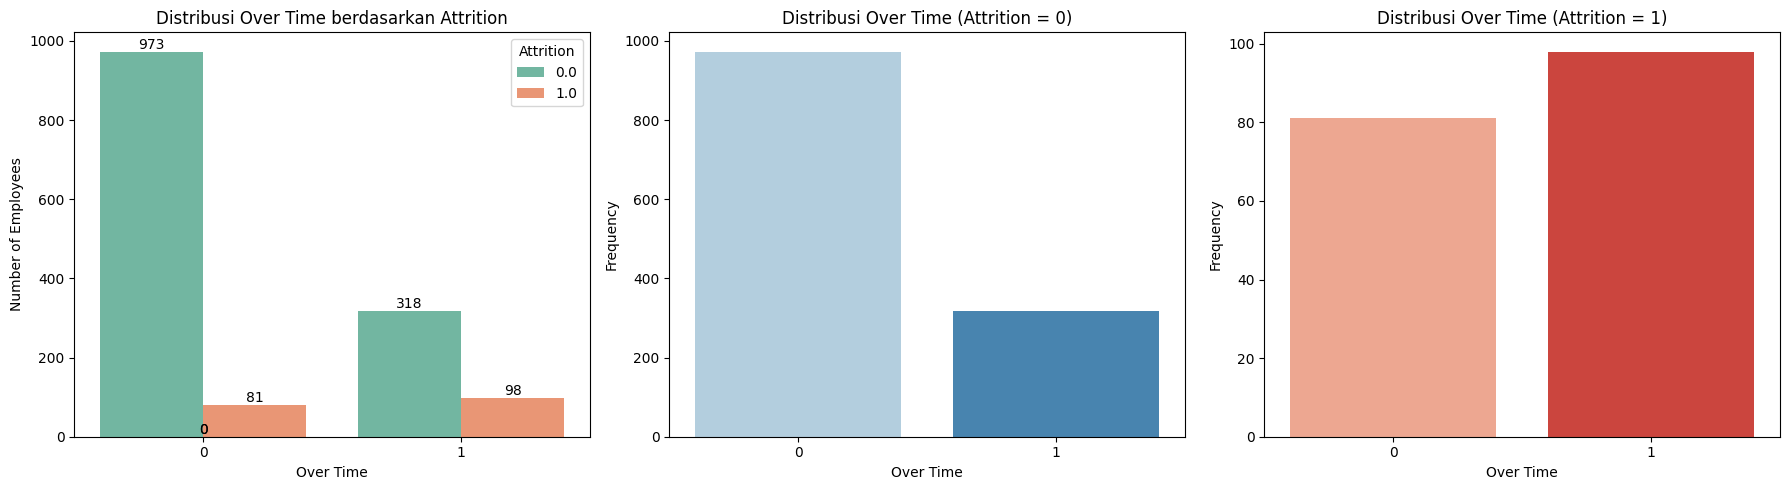

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
ax = sns.countplot(x='OverTime', hue='Attrition', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.title('Distribusi Over Time berdasarkan Attrition')
plt.xlabel('Over Time')
plt.ylabel('Number of Employees')

plt.subplot(1, 3, 2)
sns.countplot(data=df[df['Attrition'] == 0], x='OverTime', palette='Blues')
plt.title('Distribusi Over Time (Attrition = 0)')
plt.xlabel('Over Time')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.countplot(data=df[df['Attrition'] == 1], x='OverTime', palette='Reds')
plt.title('Distribusi Over Time (Attrition = 1)')
plt.xlabel('Over Time')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Dari grafik tersebut, terlihat bahwa persentase pegawai yang melakukan lembur dan kemudian keluar (Attrition = 1) lebih tinggi dibandingkan dengan proporsi pegawai yang tidak melakukan lembur dan keluar dengan perbedaan yang cukup signifikan. Hal tersebut juga dapat dilihat melalui perbedaan skewness dari diagram distribusi over time untuk masing-masing attrition di mana pegawai yang bertahan memiliki distribusi miring ke kanan sedangkan pegawai yang keluar memiliki distribusi miring ke kiri. Fakta tersebut menunjukan hubungan yang cukup penting antara Over Time dengan keputusan pegawai pada attrition.

### Hubungan Attrition dengan Job Involvement

In [ ]:
print(df.JobInvolvement.value_counts())

JobInvolvement
3    868
2    375
4    144
1     83
Name: count, dtype: int64


<ipython-input-41-a51a87dddfe8>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 0], x='JobInvolvement', palette='Blues')
<ipython-input-41-a51a87dddfe8>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 1], x='JobInvolvement', palette='Reds')


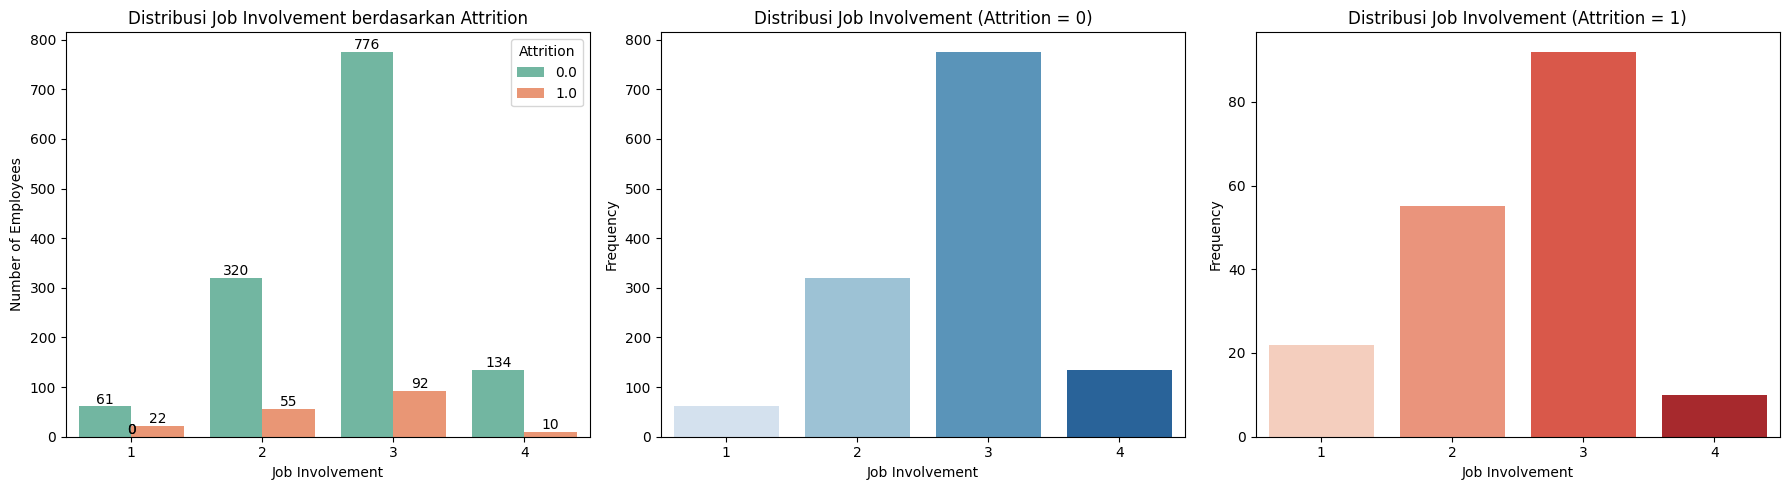

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
ax = sns.countplot(x='JobInvolvement', hue='Attrition', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.title('Distribusi Job Involvement berdasarkan Attrition')
plt.xlabel('Job Involvement')
plt.ylabel('Number of Employees')

plt.subplot(1, 3, 2)
sns.countplot(data=df[df['Attrition'] == 0], x='JobInvolvement', palette='Blues')
plt.title('Distribusi Job Involvement (Attrition = 0)')
plt.xlabel('Job Involvement')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.countplot(data=df[df['Attrition'] == 1], x='JobInvolvement', palette='Reds')
plt.title('Distribusi Job Involvement (Attrition = 1)')
plt.xlabel('Job Involvement')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Dari grafik terlihat bahwa persentase pegawai dengan tingkat keterlibatan pekerjaan yang rendah (nilai lebih kecil) dan keluar dari perusahaan (Attrition = 1) lebih tinggi dibandingkan dengan persentase pegawai dengan tingkat keterlibatan yang tinggi dan keluar. Sebaliknya, persentase pegawai dengan tingkat keterlibatan pekerjaan yang tinggi dan tetap bertahan (Attrition = 0) lebih besar. Fakta bahwa "job involvement" menjadi salah satu fitur penting dalam model prediksi attrition menguatkan hipotesis bahwa tingkat keterlibatan pegawai memiliki pengaruh signifikan terhadap keputusan mereka untuk tetap bertahan atau keluar dari perusahaan.

### Hubungan Attrition dengan Stock Option Level

In [ ]:
print(df.StockOptionLevel.value_counts())

StockOptionLevel
0    631
1    596
2    158
3     85
Name: count, dtype: int64


<ipython-input-43-66571d8720b7>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 0], x='StockOptionLevel', palette='Blues')
<ipython-input-43-66571d8720b7>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df[df['Attrition'] == 1], x='StockOptionLevel', palette='Reds')


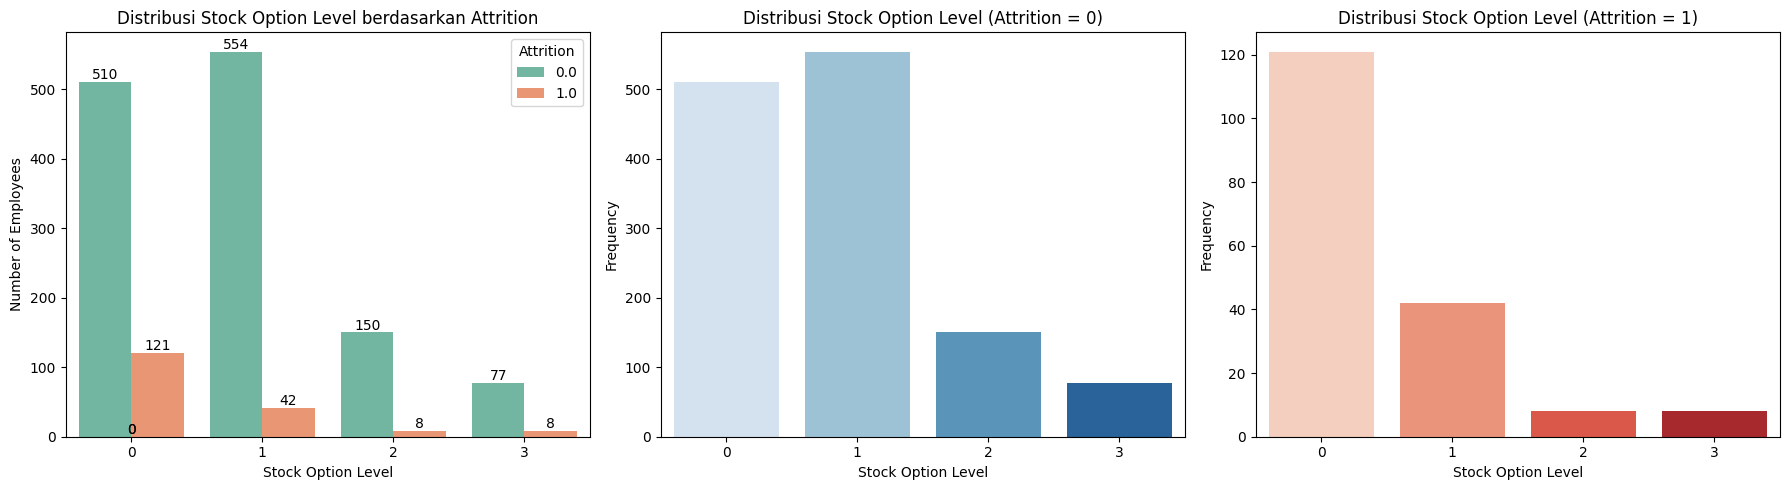

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
ax = sns.countplot(x='StockOptionLevel', hue='Attrition', data=df, palette='Set2')
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                fontsize=10, color='black',
                xytext=(0, 5), textcoords='offset points')
plt.title('Distribusi Stock Option Level berdasarkan Attrition')
plt.xlabel('Stock Option Level')
plt.ylabel('Number of Employees')

plt.subplot(1, 3, 2)
sns.countplot(data=df[df['Attrition'] == 0], x='StockOptionLevel', palette='Blues')
plt.title('Distribusi Stock Option Level (Attrition = 0)')
plt.xlabel('Stock Option Level')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.countplot(data=df[df['Attrition'] == 1], x='StockOptionLevel', palette='Reds')
plt.title('Distribusi Stock Option Level (Attrition = 1)')
plt.xlabel('Stock Option Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Dari grafik terlihat bahwa persentase pegawai dengan tingkat opsi saham yang lebih tinggi dan tetap bertahan (Attrition = 0) lebih besar dibandingkan dengan persentase pegawai dengan tingkat opsi saham yang lebih rendah dan tetap bertahan. Hal tersebut mengindikasikan bahwa opsi saham dapat berfungsi sebagai insentif yang efektif untuk mempertahankan pegawai. Pegawai dengan opsi saham yang lebih tinggi mungkin merasa lebih terikat dengan perusahaan dan memiliki insentif yang lebih besar untuk tetap bertahan.

### Hubungan Attrition dengan Years Since Last Promotion

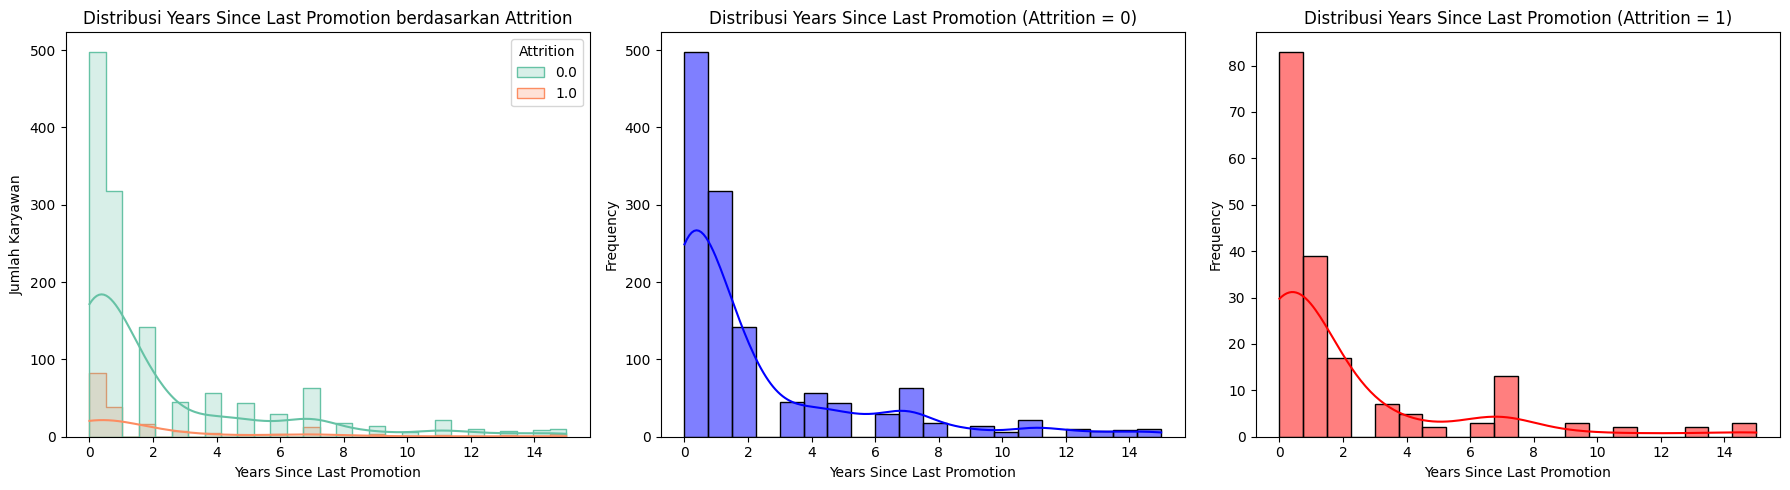

In [ ]:
plt.figure(figsize=(18, 5))

plt.subplot(1, 3, 1)
sns.histplot(data=df, x='YearsSinceLastPromotion', hue='Attrition', kde=True, element="step", palette='Set2')
plt.title('Distribusi Years Since Last Promotion berdasarkan Attrition')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Jumlah Karyawan')

plt.subplot(1, 3, 2)
sns.histplot(data=df[df['Attrition'] == 0], x='YearsSinceLastPromotion', kde=True, color='blue', bins=20)
plt.title('Distribusi Years Since Last Promotion (Attrition = 0)')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
sns.histplot(data=df[df['Attrition'] == 1], x='YearsSinceLastPromotion', kde=True, color='red', bins=20)
plt.title('Distribusi Years Since Last Promotion (Attrition = 1)')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

Dari grafik terlihat bahwa persentase pegawai yang sudah lama tidak naik jabatan dan kemudian keluar (Attrition = 1) lebih tinggi dibandingkan dengan persentase pegawai yang baru saja naik jabatan atau sering naik jabatan dan tetap bertahan (Attrition = 0). Hal tersebut mengindikasikan bahwa pegawai yang lebih sering mendapatkan promosi memiliki kemungkinan keluar dari perusahaan yang lebih kecil.

## Kesimpulan

Proyek ini berfokus pada analisis faktor-faktor yang memengaruhi keputusan pegawai untuk keluar dari perusahaan (attrition) dan membangun model prediksi untuk mengidentifikasi pegawai dengan risiko tinggi attrition. Berdasarkan hasil analisis data dan pemodelan, berikut adalah kesimpulan terkait permasalahan yang diajukan:

1. Faktor utama yang paling memengaruhi attrition pegawai

Faktor-faktor utama yang memengaruhi attrition meliputi Over Time, Monthly Income, dan Job Involvement, sebagaimana ditunjukkan oleh feature importance. Pegawai yang bekerja lembur secara signifikan lebih rentan terhadap attrition, menunjukkan bahwa keseimbangan antara pekerjaan dan kehidupan pribadi merupakan faktor penting.

2. Peran faktor demografis seperti usia, status pernikahan, dan latar belakang pendidikan

Faktor usia terbukti berperan dalam attrition, dengan pegawai yang lebih muda cenderung memiliki kemungkinan lebih besar untuk keluar. Meskipun status pernikahan dan latar belakang pendidikan tidak termasuk dalam fitur paling penting, distribusi usia menunjukkan bahwa faktor demografis tertentu tetap relevan dalam analisis ini.

3. Faktor pekerjaan yang paling signifikan terhadap attrition

Tingkat keterlibatan kerja (Job Involvement), keseimbangan kerja-kehidupan (Over Time), dan peluang promosi (Years Since Last Promotion) merupakan faktor pekerjaan yang paling signifikan. Pegawai yang merasa kurang terlibat atau jarang dipromosikan cenderung lebih mungkin untuk keluar, sebagaimana didukung oleh visualisasi dan model prediksi.

4. Hubungan tingkat pendapatan bulanan maupun harian dengan attrition

Pegawai dengan pendapatan bulanan atau harian yang lebih rendah cenderung lebih mudah keluar dari perusahaan. Visualisasi menunjukkan bahwa tingkat pendapatan adalah salah satu indikator kuat, dengan distribusi yang lebih rendah pada pegawai yang keluar dibandingkan yang bertahan.

5. Tingkat attrition berdasarkan departemen

Analisis menunjukkan bahwa pegawai di departemen Sales memiliki tingkat persentase attrition tertinggi dibandingkan departemen lain. Hal ini menunjukkan bahwa kondisi pekerjaan di departemen tertentu, terutama Sales, mungkin kurang memuaskan dibandingkan dengan departemen lain.

6. Kemampuan model prediksi untuk mengidentifikasi risiko attrition

Model prediksi yang dibangun mampu mengidentifikasi pegawai dengan risiko tinggi attrition menggunakan fitur seperti Over Time, Monthly Income, dan Stock Option Level. Akurasi yang dicapai oleh ketiga model juga cukup baik yang berada di angka sekitar 89%.

In [ ]:
from google.colab import files
real_df.to_csv('final_employee.csv', index=False)
files.download('final_employee.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>